<a href="https://colab.research.google.com/github/HariSudhan76/DataVisualization/blob/Matplotlib/MatplotlibBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Line Charts**

In [24]:
inventory = pd.read_csv("housing_data.csv")


<ipython-input-53-b9fcf3ebfa27>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  inv_monthly = inv_monthly.resample("M").sum()/100000


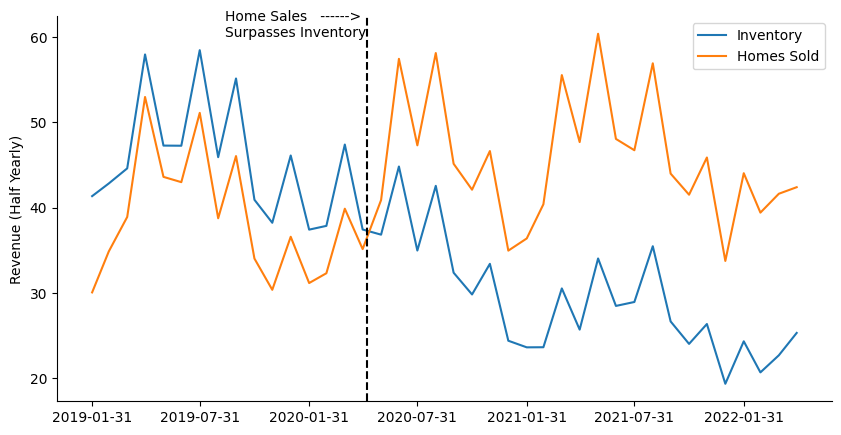

In [53]:
#inv["startdate"]= pd.to_datetime(inventory["period_begin"])
housing = inventory.assign(period_begin=pd.to_datetime(inventory.period_begin))
inv = housing.groupby(by="period_begin")[[
    "inventory","total_homes_sold"
    ]].sum()
inv["startdate"] = inv.index.to_numpy().astype("datetime64[M]")
inv_monthly = inv[inv.index>='2019']
inv_monthly = inv_monthly.resample("M").sum()/100000
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(inv_monthly)
ax.set_ylabel("Revenue (Half Yearly)")
ax.set_xticks(inv_monthly.index[::6])
ax.legend(["Inventory","Homes Sold"])
ax.text(18150,60,"Home Sales   ------>\nSurpasses Inventory")
ax.axvline(18390,c="black",ls="--")
ax.spines[["right","top"]].set_visible(False)
plt.show()

# **Stacked Line Chart**

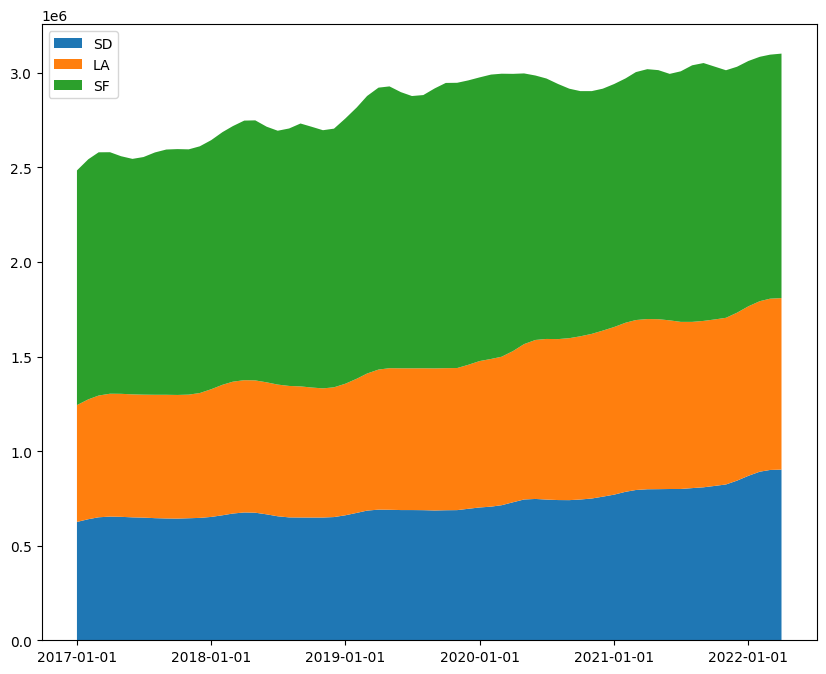

In [69]:
ca_housing = inventory[inventory["region_name"].str.contains("CA")].assign(region_name=inventory.region_name.str[0:-11])
ca_housing["period_begin"] = ca_housing["period_begin"].to_numpy().astype("datetime64[M]")
ca_housing_pivot = (
    ca_housing.pivot_table(index = "period_begin",
                           columns = "region_name",
                           values = "median_active_list_price")
                          .assign(CA_Average = lambda x:round(x.mean(axis=1),2))
                          .loc[:,["Los Angeles","San Diego","San Francisco","CA_Average"]]

)
fig, ax  = plt.subplots(figsize = (10,8))
labels = ["SD", "LA", "SF"]
ax.stackplot(ca_housing_pivot.index,ca_housing_pivot["San Diego"]
             ,ca_housing_pivot["Los Angeles"],
             ca_housing_pivot["San Francisco"],
             labels = labels,
             cmap='Pastel2'
             )

ax.set_xticks(ca_housing_pivot.index[::12])
ax.legend(loc="upper left")
plt.show()

